# Numpy exercises

In [3]:
import numpy as np

## Array manipulation

1: Form the 2-D array (without typing it in explicitly):
[[1,  6, 11],
 [2,  7, 12],
 [3,  8, 13],
 [4,  9, 14],
 [5, 10, 15]]
and generate a new array containing its 2nd and 4th rows.

In [4]:
a = np.arange(1,16).reshape(3,5).T
a

array([[ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14],
       [ 5, 10, 15]])

In [5]:
a[[1,3]]

array([[ 2,  7, 12],
       [ 4,  9, 14]])

2: Divide each column of the array `a` elementwise with the array `b`. (Hint: np.newaxis).

In [6]:
a = np.arange(25).reshape(5, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [7]:
b = np.array([1., 5, 10, 15, 20])
b

array([  1.,   5.,  10.,  15.,  20.])

In [8]:
a/b

array([[  0.        ,   0.2       ,   0.2       ,   0.2       ,   0.2       ],
       [  5.        ,   1.2       ,   0.7       ,   0.53333333,   0.45      ],
       [ 10.        ,   2.2       ,   1.2       ,   0.86666667,   0.7       ],
       [ 15.        ,   3.2       ,   1.7       ,   1.2       ,   0.95      ],
       [ 20.        ,   4.2       ,   2.2       ,   1.53333333,   1.2       ]])

In [9]:
a/b[:,np.newaxis]

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [ 1.        ,  1.2       ,  1.4       ,  1.6       ,  1.8       ],
       [ 1.        ,  1.1       ,  1.2       ,  1.3       ,  1.4       ],
       [ 1.        ,  1.06666667,  1.13333333,  1.2       ,  1.26666667],
       [ 1.        ,  1.05      ,  1.1       ,  1.15      ,  1.2       ]])

In [10]:
b[np.newaxis, :]

array([[  1.,   5.,  10.,  15.,  20.]])

In [11]:
b[:, np.newaxis]

array([[  1.],
       [  5.],
       [ 10.],
       [ 15.],
       [ 20.]])

3: Generate a 10 x 3 array of random numbers (in range [0,1]). For each row, pick the number closest to 0.5.
Use abs and argsort to find the column j closest for each row.
Use fancy indexing to extract the numbers. (Hint: a[i,j] – the array i must contain the row numbers corresponding to stuff in j.)

In [12]:
a = np.random.rand(10,3)
a

array([[ 0.05951854,  0.93633714,  0.01414879],
       [ 0.86958356,  0.82578019,  0.76553083],
       [ 0.54477314,  0.56479064,  0.9949271 ],
       [ 0.59688069,  0.93734714,  0.18799457],
       [ 0.46309342,  0.92830933,  0.59095771],
       [ 0.25609093,  0.57535513,  0.7066228 ],
       [ 0.4842344 ,  0.14907874,  0.73627954],
       [ 0.26703668,  0.018867  ,  0.37683562],
       [ 0.69822064,  0.73242894,  0.35477074],
       [ 0.89977846,  0.53729369,  0.73520095]])

In [13]:
s = np.argsort(np.abs(a-0.5))
s

array([[1, 0, 2],
       [2, 1, 0],
       [0, 1, 2],
       [0, 2, 1],
       [0, 2, 1],
       [1, 2, 0],
       [0, 2, 1],
       [2, 0, 1],
       [2, 0, 1],
       [1, 2, 0]], dtype=int64)

In [14]:
s[:, 0]
# Alternatively one can solve with: 
# np.argmin(np.abs(a-0.5), 1)

array([1, 2, 0, 0, 0, 1, 0, 2, 2, 1], dtype=int64)

In [15]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
a[np.arange(10), s[:, 0]].reshape(10, 1)

array([[ 0.93633714],
       [ 0.76553083],
       [ 0.54477314],
       [ 0.59688069],
       [ 0.46309342],
       [ 0.57535513],
       [ 0.4842344 ],
       [ 0.37683562],
       [ 0.35477074],
       [ 0.53729369]])

## Picture manipulation

Populating the interactive namespace from numpy and matplotlib


C:\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


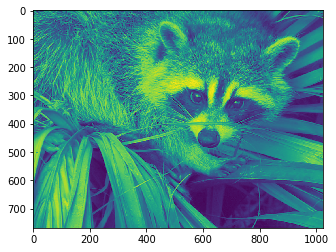

In [17]:
from scipy import misc
import pylab as plt
%pylab inline

face = misc.face(gray=True)
plt.imshow(face)    

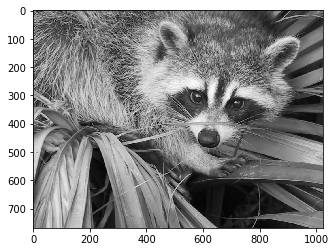

In [18]:
plt.imshow(face, cmap=plt.cm.gray)

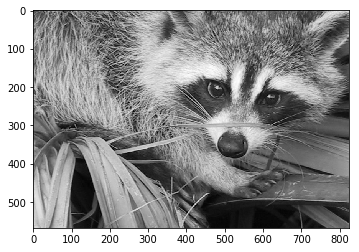

In [19]:
crop_face = face[100:-100, 100:-100]
plt.imshow(crop_face, cmap=plt.cm.gray)

In [20]:
sy, sx = face.shape
y, x = np.ogrid[0:sy, 0:sx] # x and y indices of pixels
y.shape, x.shape
((768, 1), (1, 1024))
centerx, centery = (660, 300) # center of the image
mask = ((y - centery)**2 + (x - centerx)**2) > 230**2

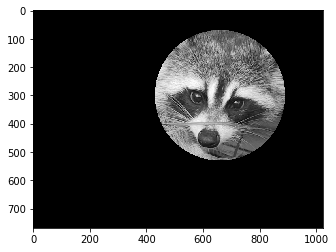

In [21]:
face[mask] = 0
plt.imshow(face, cmap=plt.cm.gray)

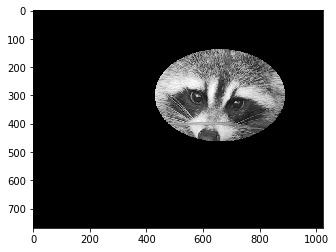

In [22]:
mask_ellipse = ((y - centery)**2/0.5 + (x - centerx)**2)/1 > 230**2
face = misc.face(gray=True)
face[mask_ellipse] = 0
plt.imshow(face, cmap=plt.cm.gray)

## Data statistics

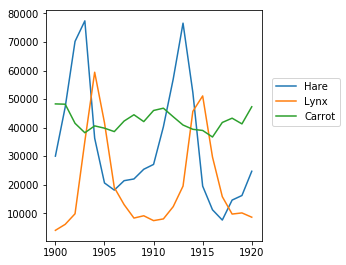

In [23]:
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T  # trick: columns to variables

import matplotlib.pyplot as plt
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 

Computes and print, based on the data in populations.txt...
 - The mean and std of the populations of each species for the years in the period.
 - Which year each species had the largest population.
 - Which species has the largest population for each year. (Hint: argsort & fancy indexing of np.array(['H', 'L', 'C']))
 - Which years any of the populations is above 50000. (Hint: comparisons and np.any)
 - The top 2 years for each species when they had the lowest populations. (Hint: argsort, fancy indexing)
 - Compare (plot) the change in hare population (see help(np.gradient)) and the number of lynxes. Check correlation (see help(np.corrcoef)).
 
... all without for-loops.

In [24]:
data

array([[  1900.,  30000.,   4000.,  48300.],
       [  1901.,  47200.,   6100.,  48200.],
       [  1902.,  70200.,   9800.,  41500.],
       [  1903.,  77400.,  35200.,  38200.],
       [  1904.,  36300.,  59400.,  40600.],
       [  1905.,  20600.,  41700.,  39800.],
       [  1906.,  18100.,  19000.,  38600.],
       [  1907.,  21400.,  13000.,  42300.],
       [  1908.,  22000.,   8300.,  44500.],
       [  1909.,  25400.,   9100.,  42100.],
       [  1910.,  27100.,   7400.,  46000.],
       [  1911.,  40300.,   8000.,  46800.],
       [  1912.,  57000.,  12300.,  43800.],
       [  1913.,  76600.,  19500.,  40900.],
       [  1914.,  52300.,  45700.,  39400.],
       [  1915.,  19500.,  51100.,  39000.],
       [  1916.,  11200.,  29700.,  36700.],
       [  1917.,   7600.,  15800.,  41800.],
       [  1918.,  14600.,   9700.,  43300.],
       [  1919.,  16200.,  10100.,  41300.],
       [  1920.,  24700.,   8600.,  47300.]])

In [25]:
populations = data[:,1:]

print "       Hares, Lynxes, Carrots"
print "Mean:", populations.mean(axis=0)
print "Std:", populations.std(axis=0)

j_max_years = np.argmax(populations, axis=0)
print "Max. year:", year[j_max_years]

max_species = np.argmax(populations, axis=1)
species = np.array(['Hare', 'Lynx', 'Carrot'])
print "Max species:"
print year
print species[max_species]

above_50000 = np.any(populations > 50000, axis=1)
print "Any above 50000:", year[above_50000]

j_top_2 = np.argsort(populations, axis=0)[:2]
print "Top 2 years with lowest populations for each:"
print year[j_top_2]

hare_grad = np.gradient(hares)
print "diff(Hares) vs. Lynxes correlation", np.corrcoef(hare_grad, lynxes)[0,1]

plt.plot(year, hare_grad, year, -lynxes)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("       Hares, Lynxes, Carrots")? (<ipython-input-25-406c662f012c>, line 3)

## Crude integral approximations

In [33]:
def f(a, b, c):
    return a**b - c

a = np.linspace(0, 1, 24)
b = np.linspace(0, 1, 12)
c = np.linspace(0, 1, 6)

samples = f(a[:, np.newaxis, np.newaxis],
            b[np.newaxis, :, np.newaxis],
            c[np.newaxis, np.newaxis, :])

# or,
#
# a, b, c = np.ogrid[0:1:24j, 0:1:12j, 0:1:6j]
# samples = f(a, b, c)

integral = samples.mean()

print ("Approximation:", integral)
print ("Exact:", np.log(2) - 0.5)

Approximation: 0.18884234603
Exact: 0.19314718056


## Mandelbrot set

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in square
  if sys.path[0] == '':
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


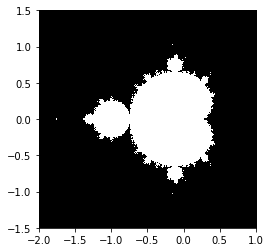

In [28]:
def compute_mandelbrot(N_max, some_threshold, nx, ny):
    # A grid of c-values
    x = np.linspace(-2, 1, nx)
    y = np.linspace(-1.5, 1.5, ny)

    c = x[:, np.newaxis] + 1j*y[np.newaxis, :]

    # Mandelbrot iteration

    z = c
    for j in range(N_max):
        z = z**2 + c

    mandelbrot_set = (abs(z) < some_threshold)

    return mandelbrot_set

# Save

mandelbrot_set = compute_mandelbrot(50, 50., 601, 401)

plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])
plt.gray()

## Markov chain

In [32]:
np.random.seed(1234)

n_states = 5
n_steps = 50
tolerance = 1e-5

# Random transition matrix and state vector
P = np.random.rand(n_states, n_states)
p = np.random.rand(n_states)

# Normalize rows in P
P /= P.sum(axis=1)[:,np.newaxis]

# Normalize p
p /= p.sum()

# Take steps
for k in range(n_steps):
    p = P.T.dot(p)

p_50 = p
print(p_50)

# Compute stationary state
w, v = np.linalg.eig(P.T)

j_stationary = np.argmin(abs(w - 1.0))
p_stationary = v[:,j_stationary].real
p_stationary /= p_stationary.sum()
print(p_stationary)

# Compare
if all(abs(p_50 - p_stationary) < tolerance):
    print("Tolerance satisfied in infty-norm")

if np.linalg.norm(p_50 - p_stationary) < tolerance:
    print("Tolerance satisfied in 2-norm")


[ 0.13953703  0.19482107  0.11068456  0.24536522  0.30959211]
[ 0.13953703  0.19482107  0.11068456  0.24536522  0.30959211]
Tolerance satisfied in infty-norm
Tolerance satisfied in 2-norm
